In [112]:
# Importing libraries np,pd,plt,visulaisation, sns, logistic regression libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [113]:
#read csv 
lead = pd.read_csv("C:/Users/91779/Desktop/Leads.csv") 

# Data cleaning and preparation

In [114]:
#check  records 
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [115]:
#Lead info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [116]:
#lead shape
lead.shape

(9240, 37)

In [117]:
#Lead describe 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [118]:
# Convert 'Select'  to NaN.
lead = lead.replace('Select', np.nan)

In [119]:
# check null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [120]:
# List of variables to map

lead_varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[lead_varlist] = lead[lead_varlist].apply(binary_map)

In [121]:
#recheck after variable mapping 
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [122]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_lead = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy_lead.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
# we will drop the columns having more than 70% NA values.
lead =lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>70)].columns, 1)

In [124]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [125]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

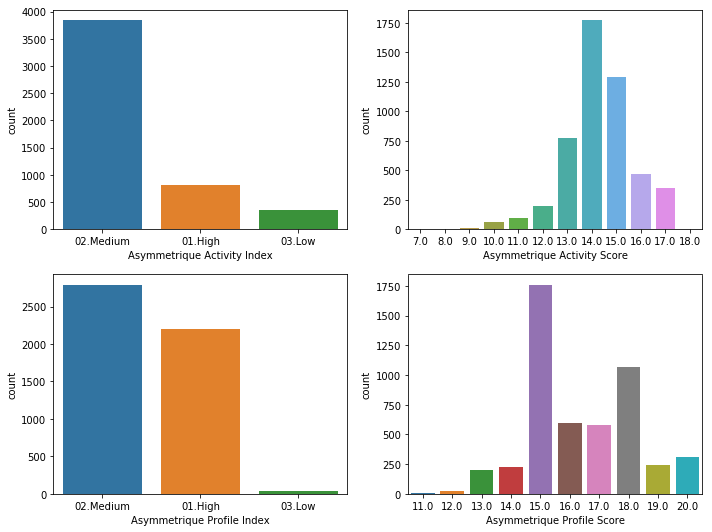

In [126]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.countplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.countplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [127]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [128]:
# Replacing values with most occcuring values

In [129]:
lead.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [130]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [131]:
lead.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [132]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

In [133]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [134]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [135]:
lead.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [136]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [137]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [138]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [139]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [140]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [141]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [142]:
# drop null values
lead.dropna(inplace = True)

In [143]:
#converting the lead 
lead_Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
lead_Converted

37.85541106458012

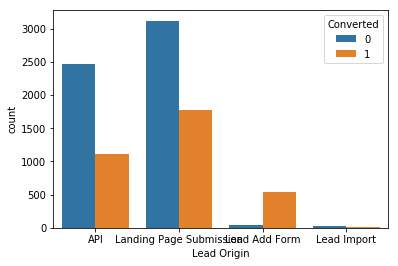

In [144]:
#Setting the origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
# xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

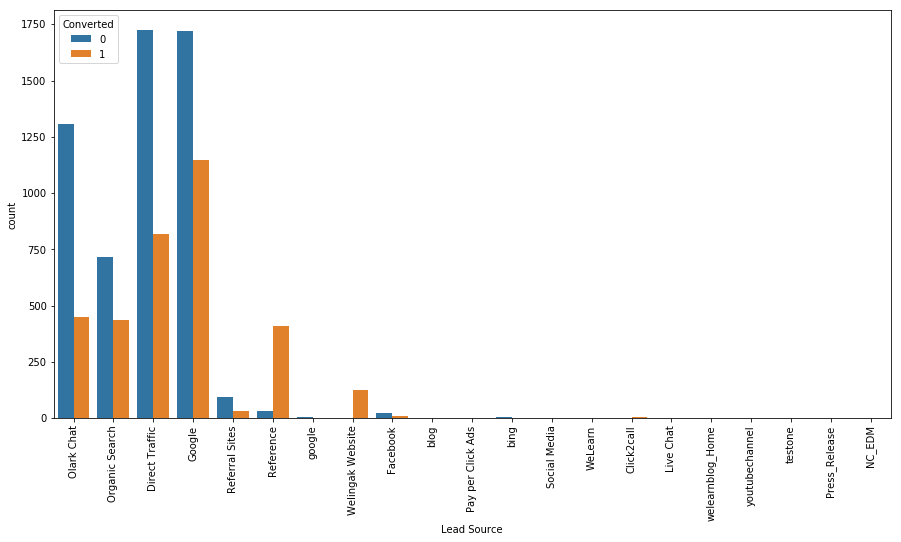

In [145]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)

In [146]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

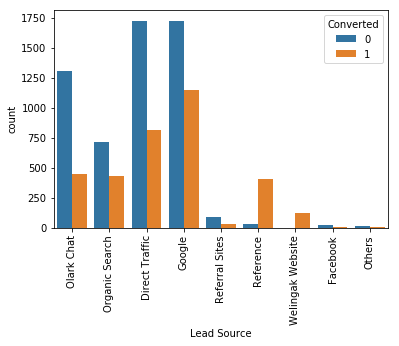

In [147]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)

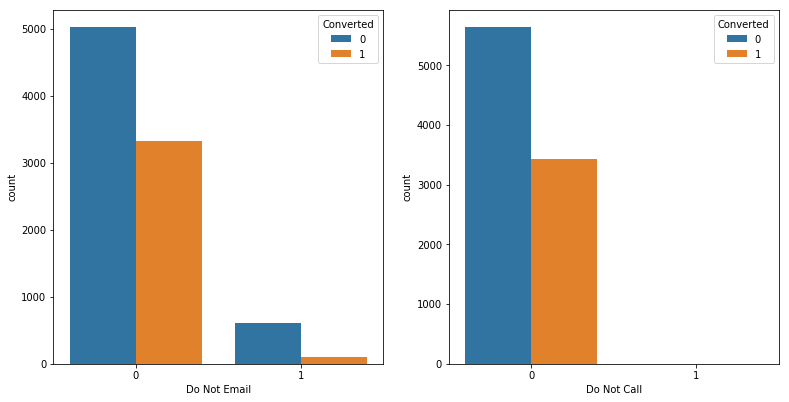

In [148]:
fig, axs = plt.subplots(1,2,figsize = (13,6.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, ax = axs[1])

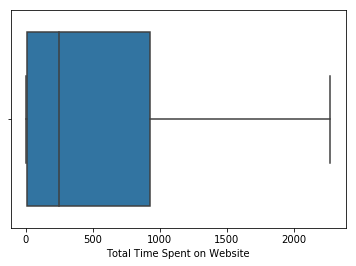

In [149]:
sns.boxplot(lead['Total Time Spent on Website'])

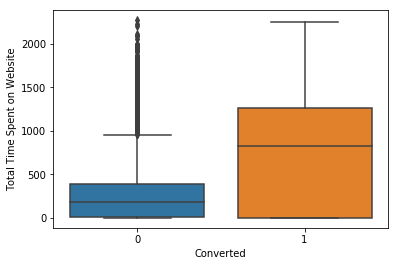

In [150]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)

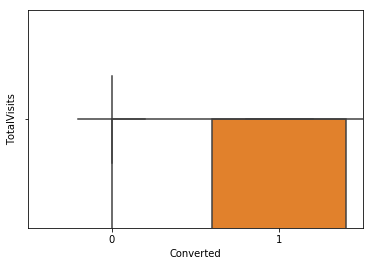

In [151]:
sns.boxplot(lead['Total Time Spent on Website'])
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text xticklabel objects>)

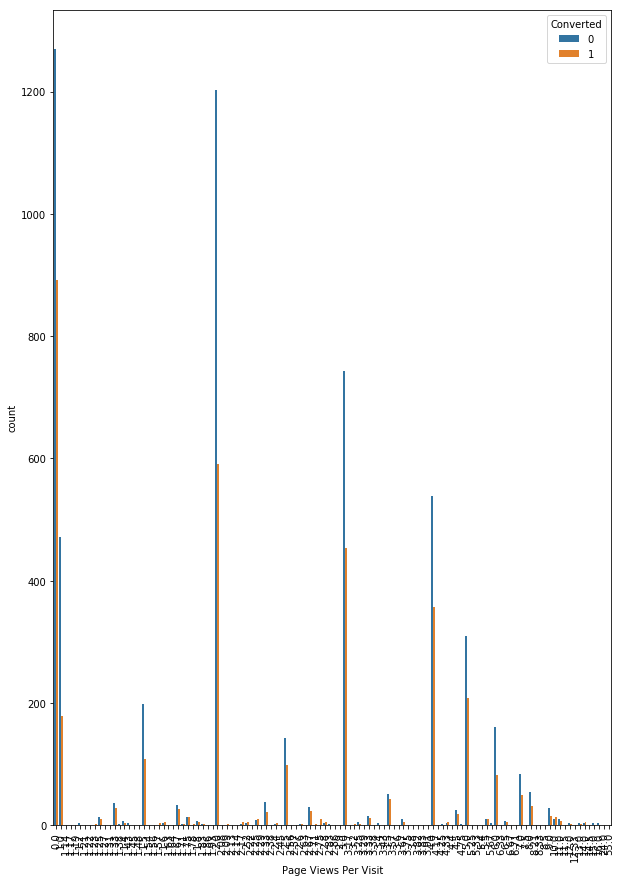

In [152]:
fig, axs = plt.subplots(figsize = (10,15))
sns.countplot(x = "Page Views Per Visit", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

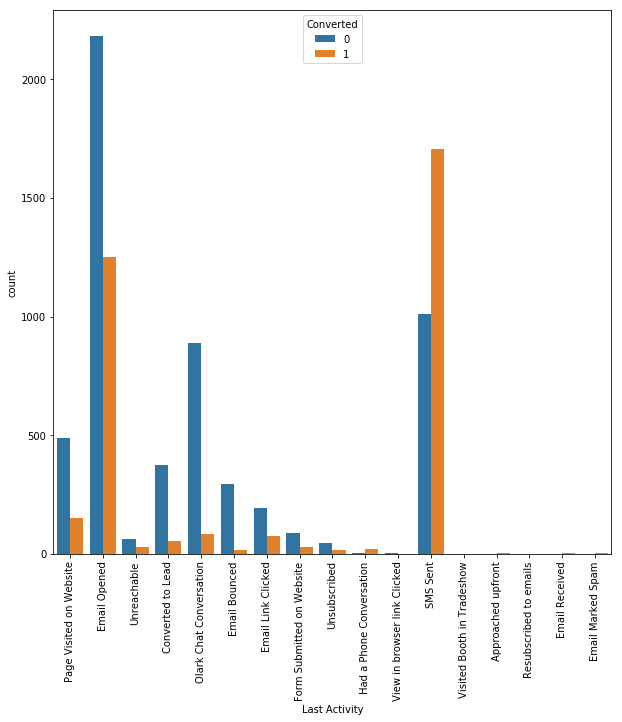

In [153]:
fig, axs = plt.subplots(figsize = (10,10))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
xticks(rotation = 90)

In [154]:
lead['Specialization'] = lead['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

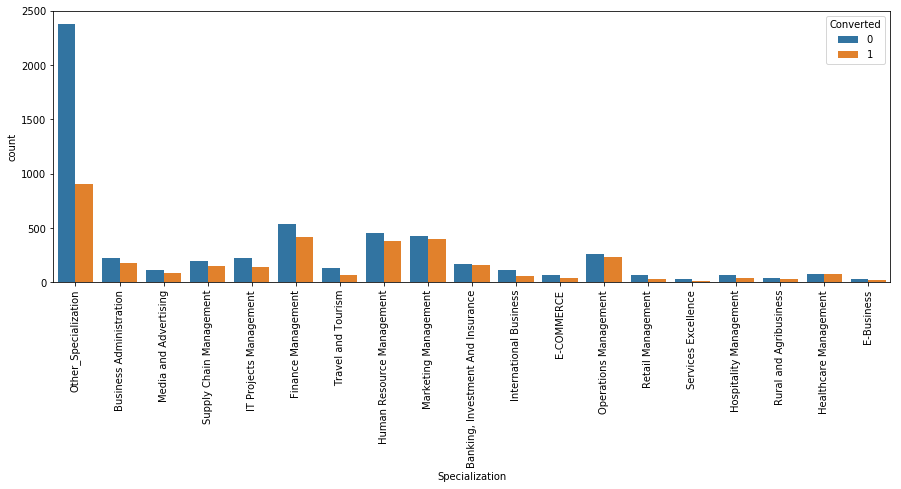

In [155]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
xticks(rotation = 90)

In [156]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

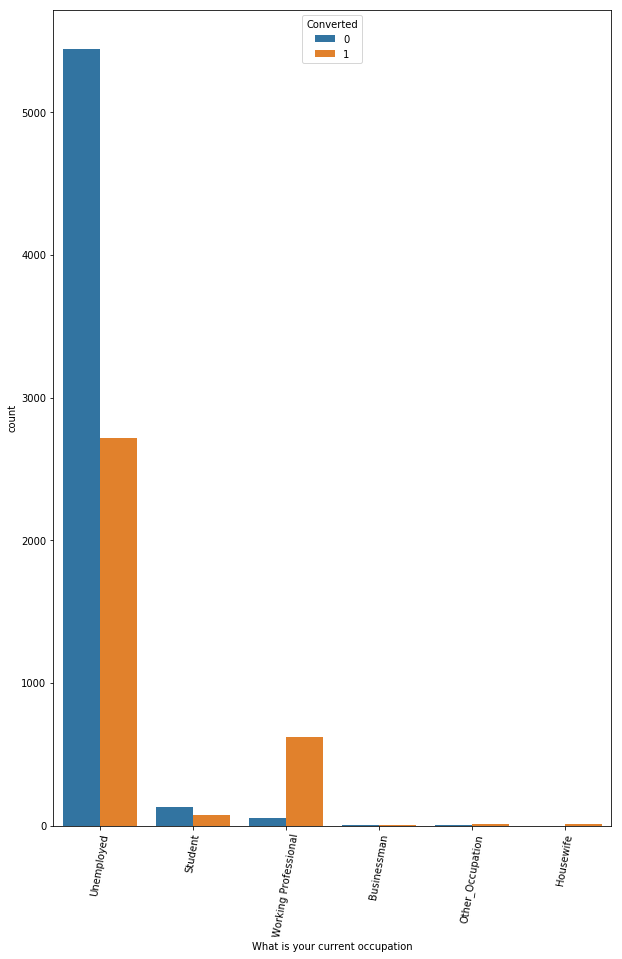

In [157]:
fig, axs = plt.subplots(figsize = (10,15))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
xticks(rotation = 80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

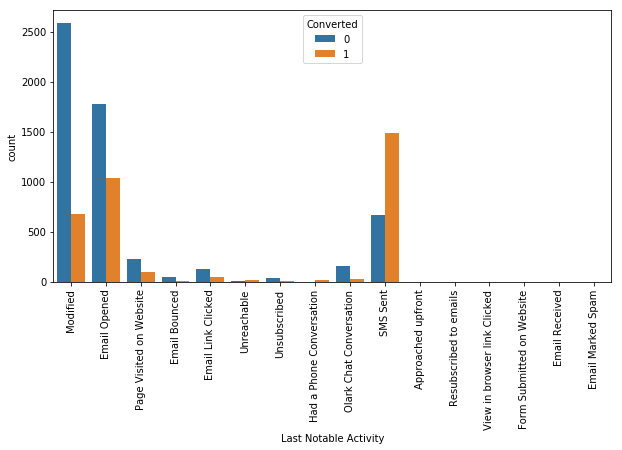

In [158]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

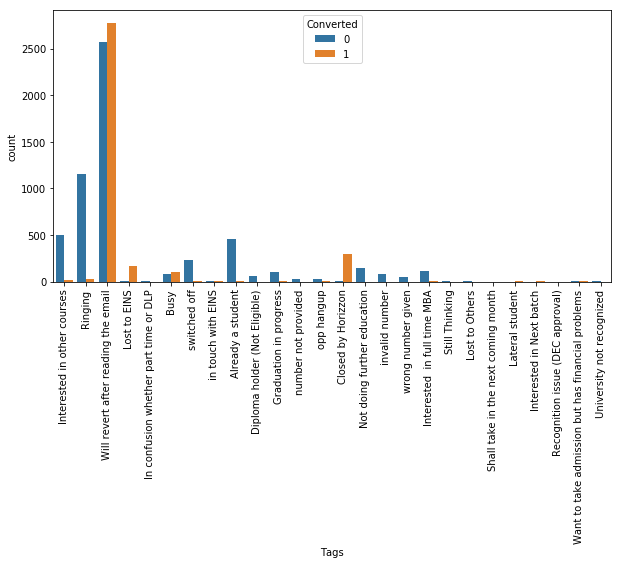

In [159]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
xticks(rotation = 90)

In [160]:
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

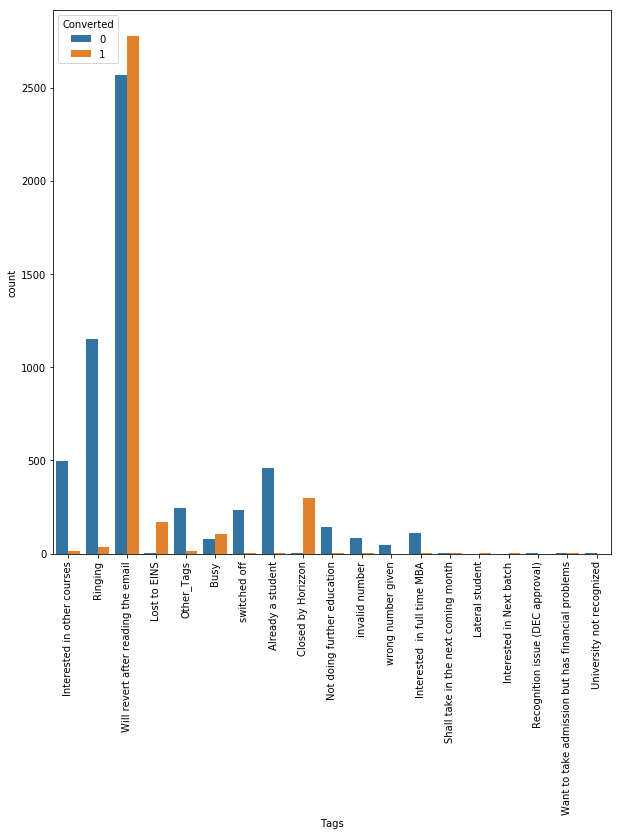

In [161]:
fig, axs = plt.subplots(figsize = (10,10))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

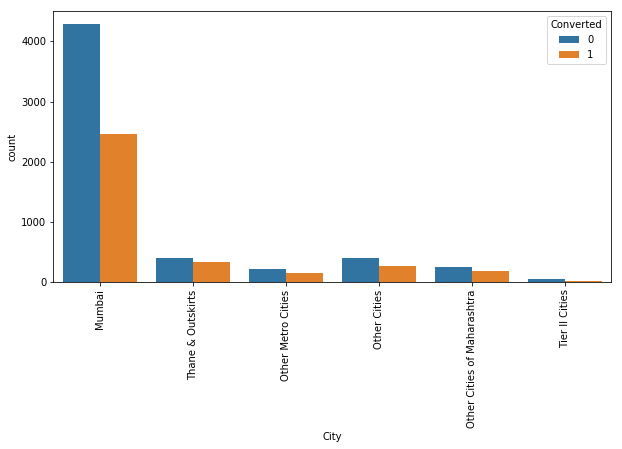

In [162]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = lead)
xticks(rotation = 90)

In [163]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null int64
Do Not Call                                      9074 non-null int64
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 no

In [164]:
lead.shape

(9074, 31)

In [165]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [166]:
#drop values which are not useful
lead = lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [167]:
lead.shape

(9074, 16)

In [168]:
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [169]:
#concatenate
lead = pd.concat([lead, dummy1], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [170]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [171]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [172]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)

In [173]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [174]:
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Model building

In [175]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [176]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

S:\AnacodaPy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
S:\AnacodaPy\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,2.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [177]:
# Checking the Churn Rate
Converted_lead = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted_lead

37.85541106458012

In [178]:
x1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
x1.fit().summary()

S:\AnacodaPy\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
S:\AnacodaPy\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
S:\AnacodaPy\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
S:\AnacodaPy\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
S:\AnacodaPy\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
S:\AnacodaPy\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zer

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           95
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        08:11:50   Pearson chi2:                 3.42e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   4.175e+15   7.34e+07   5.69e+07      0.000    4.17e+15    4.17e+15
Do Not Email                                            -3.95e+14   4.46e+06  -8.86e+07      0.000   -3.95e+14   -3.95e+14
Do Not Call                                             3.688e+15   4.78e+07   7.72e+07      0.000    3.69e+15    3.69e+15
TotalVisits                                             5.518e+13      1e+06   5.51e+07      0.000    5.52e+13    5.52e+13
Total Time Spent on Website                             2.803e+14   1.02e+06   2.74e+08      0.000     2.8e+14     2.8e+14
Page Views Per Visit                                   -2.557e+13   5.99e+05  -4.27e+07      0.000   -2.56e+13   -2.56e+13
Lead Origin_Landing Page Submission                    -3.255e+14   3.37e+06  -9.65e+07      0.000   -3.25e+14   -3.25e+14
Lead Origin_Lead Add Form                              -7.952e+14    2.9e+07  -2.74e+07      0.000   -7.95e+14   -7.95e+14
Lead Origin_Lead Import                                 6.535e+15   6.93e+07   9.43e+07      0.000    6.53e+15    6.53e+15
Lead Source_Facebook                                   -6.145e+15   6.79e+07  -9.05e+07      0.000   -6.14e+15   -6.14e+15
Lead Source_Google                                      6.214e+13   2.45e+06   2.54e+07      0.000    6.21e+13    6.21e+13
Lead Source_Olark Chat                                  3.819e+14   3.84e+06   9.94e+07      0.000    3.82e+14    3.82e+14
Lead Source_Organic Search                              5.647e+13   3.19e+06   1.77e+07      0.000    5.65e+13    5.65e+13
Lead Source_Others                                      5.039e+14   1.85e+07   2.72e+07      0.000    5.04e+14    5.04e+14
Lead Source_Reference                                    9.42e+14   2.93e+07   3.22e+07      0.000    9.42e+14    9.42e+14
Lead Source_Referral Sites                             -2.074e+13   7.85e+06  -2.64e+06      0.000   -2.07e+13   -2.07e+13
Lead Source_Welingak Website                            1.454e+15   2.98e+07   4.88e+07      0.000    1.45e+15    1.45e+15
Last Activity_Converted to Lead                        -3.115e+15   3.43e+07  -9.09e+07      0.000   -3.11e+15   -3.11e+15
Last Activity_Email Bounced                            -3.114e+15   3.46e+07  -8.99e+07      0.000   -3.11e+15   -3.11e+15
Last Activity_Email Link Clicked                       -2.922e+15    3.5e+07  -8.34e+07      0.000   -2.92e+15   -2.92e+15
Last Activity_Email Marked Spam                         8.559e+13   4.13e+07   2.07e+06      0.000    8.56e+13    8.56e+13
Last Activity_Email Opened                             -3.115e+15   3.41e+07  -9.14e+07      0.000   -3.11e+15   -3.11e+15
Last Activity_Email Received                            8.691e+14   7.54e+07   1.15e+07

In [179]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [180]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [181]:
columns = X_train.columns[rfe.support_]
columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [182]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity

In [183]:
X_train_again = sm.add_constant(X_train[columns])
x2 = sm.GLM(y_train,X_train_again, family = sm.families.Binomial())
res = x2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Mon, 10 Jun 2019   Deviance:                       3161.3
Time:                        08:11:55   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email                                            -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
========================================================================================================================
"""

In [184]:
colDrop = columns.drop('Tags_invalid number',1)
colDrop

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [185]:
X_train_again = sm.add_constant(X_train[colDrop])
x3 = sm.GLM(y_train,X_train_again, family = sm.families.Binomial())
res = x3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.7
Date:                Mon, 10 Jun 2019   Deviance:                       3173.3
Time:                        08:11:55   Pearson chi2:                 3.07e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0195      0.217     -9.308      0.000      -2.445      -1.594
Do Not Email                                            -1.3018      0.212     -6.130      0.000      -1.718      -0.886
Lead Origin_Lead Add Form                                1.0769      0.362      2.974      0.003       0.367       1.787
Lead Source_Welingak Website                             3.4268      0.818      4.190      0.000       1.824       5.030
What is your current occupation_Working Professional     1.3240      0.290      4.567      0.000       0.756       1.892
Tags_Busy                                                3.7300      0.331     11.270      0.000       3.081       4.379
Tags_Closed by Horizzon                                  7.8904      0.763     10.345      0.000       6.396       9.385
Tags_Lost to EINS                                        9.1124      0.754     12.086      0.000       7.635      10.590
Tags_Ringing                                            -1.7713      0.338     -5.244      0.000      -2.433      -1.109
Tags_Will revert after reading the email                 3.8970      0.230     16.954      0.000       3.446       4.348
Tags_switched off                                       -2.3666      0.588     -4.028      0.000      -3.518      -1.215
Tags_wrong number given                                -20.8825   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                                   -3.3417      0.128    -26.020      0.000      -3.593      -3.090
Lead Quality_Worst                                      -3.7822      0.848     -4.462      0.000      -5.444      -2.121
Last Notable Activity_SMS Sent                           2.7503      0.120     22.841      0.000       2.514       2.986
========================================================================================================================
"""

In [186]:
colDrop = colDrop.drop('Tags_wrong number given',1)
colDrop

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [187]:
X_train_again = sm.add_constant(X_train[colDrop])
x4 = sm.GLM(y_train,X_train_again, family = sm.families.Binomial())
res = x4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Mon, 10 Jun 2019   Deviance:                       3177.6
Time:                        08:11:55   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

In [188]:
y_train_pred = res.predict(X_train_again)
y_train_pred

3009    0.188037
1012    0.194070
9226    0.000805
4750    0.782077
7987    0.977003
1281    0.990228
2880    0.188037
4971    0.753104
7536    0.867357
1248    0.000805
1429    0.188037
2178    0.188037
8554    0.004367
5044    0.990228
3475    0.999260
7424    0.990228
421     0.000445
3591    0.188037
6247    0.059299
7843    0.012329
1306    0.961508
2488    0.188037
2250    0.004367
7920    0.188037
2198    0.990228
5274    0.002868
1611    0.164463
3063    0.977003
1235    0.188037
3923    0.990228
          ...   
2597    0.188037
4816    0.990228
926     0.188037
2       0.867357
3499    0.188037
4966    0.012329
3860    0.188037
4327    0.782077
2963    0.188037
5964    0.997423
7042    0.012329
3300    0.059299
5101    0.188037
1960    0.110195
5904    0.032610
2503    0.188037
6356    0.050327
5886    0.059299
7886    0.004367
1394    0.188037
4475    0.002868
839     0.951071
5760    0.000805
8056    0.999132
4245    0.867357
367     0.188037
82      0.961508
8199    0.0357

In [189]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.18803716, 0.19407008, 0.00080488, ..., 0.03577868, 0.00436675,
       0.00436675])

In [190]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188037,3009
1,0,0.194070,1012
2,0,0.000805,9226
3,1,0.782077,4750
4,1,0.977003,7987


In [191]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# check y_train_pred_final
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.188037,3009,0
1,0,0.194070,1012,0
2,0,0.000805,9226,0
3,1,0.782077,4750,1
4,1,0.977003,7987,1


In [192]:
# Check correctness through Confusion matrix 
confusionMatrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusionMatrix

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

In [193]:
vif = pd.DataFrame()
vif['Features'] = X_train[colDrop].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[colDrop].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.89
12,Last Notable Activity_SMS Sent,2.85
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.11


In [194]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


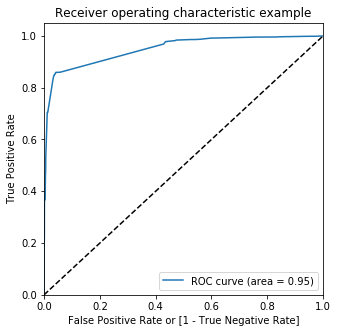

In [195]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [196]:
truePositive  = confusionMatrix[1,1] 
trueNegatives = confusionMatrix[0,0] 
falsePositives = confusionMatrix[0,1] 
falseNegatives = confusionMatrix[1,0] 

In [197]:
# create columns with different probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


In [198]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.705873,0.981603,0.533163
0.2,0.2,0.910408,0.859771,0.942125
0.3,0.3,0.918910,0.859362,0.956210
0.4,0.4,0.920013,0.858136,0.958771
0.5,0.5,0.919383,0.851594,0.961844
0.6,0.6,0.920170,0.851594,0.963124
0.7,0.7,0.919225,0.845053,0.965685
0.8,0.8,0.878287,0.705233,0.986684
0.9,0.9,0.813258,0.524530,0.994110


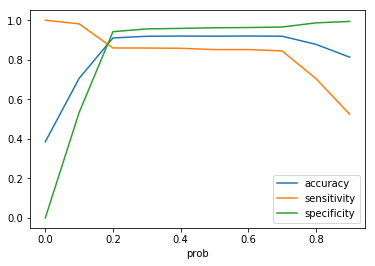

In [199]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [200]:
#0.2 is optimal point
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [201]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final1= y_train_pred_final.sort_values(by=['Lead_Score'],ascending=False)
y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
2527,1,0.996691,5390,1,1,1,1,1,1,1,1,1,1,1,1,100
2374,1,0.999260,4005,1,1,1,1,1,1,1,1,1,1,1,1,100
5904,1,0.997423,4947,1,1,1,1,1,1,1,1,1,1,1,1,100
2353,1,0.997178,8262,1,1,1,1,1,1,1,1,1,1,1,1,100
2365,1,0.999167,2725,1,1,1,1,1,1,1,1,1,1,1,1,100


In [202]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

In [203]:
# Precision
truePositive / truePositive + falsePositives
confusion[1,1]/(confusion[0,1]+confusion[1,1])

# Recall
truePositive / truePositive + falseNegatives

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

In [204]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

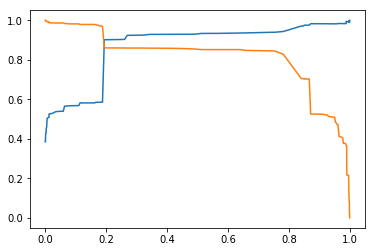

In [205]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds, recall[:-1])
plt.show()

In [206]:
#0.2 should be considered 

In [207]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

S:\AnacodaPy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
S:\AnacodaPy\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,2.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [208]:
X_test = X_test[colDrop]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [209]:
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred.head()

3271    0.188037
1490    0.961508
7936    0.188037
4216    0.999049
3830    0.188037
dtype: float64

In [210]:
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
3271,0.188037
1490,0.961508
7936,0.188037
4216,0.999049
3830,0.188037


In [211]:
y_testDf = pd.DataFrame(y_test)
y_testDf['Prospect ID'] = y_testDf.index
y_pred1.reset_index(drop=True, inplace=True)
y_testDf.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_testDf, y_pred1],axis=1)

In [212]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [213]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

In [214]:
y_pred_final.head()

,Converted,Prospect ID,Converted_probability
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [215]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_probability'], axis=1)

S:\AnacodaPy\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [216]:
y_pred_final['final_predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.2 else 0)

In [217]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


In [218]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


In [219]:
y_pred_final['lead_score'] = round(y_pred_final.Converted_probability*100)

In [220]:
y_pred_final = y_pred_final.sort_values(by=['lead_score'],ascending=False)

In [221]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,final_predicted,lead_score
1361,2118,1,0.999049,1,100.0
1762,1263,1,0.997423,1,100.0
235,7253,1,0.996691,1,100.0
1755,6729,1,0.996924,1,100.0
1195,4081,1,0.997423,1,100.0


In [222]:
# check accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.906720528828498